<a href="https://colab.research.google.com/github/ton-oliveira/challenge1-data-science/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importar Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from matplotlib.ticker import MultipleLocator

sns.set_theme(style="whitegrid", palette="pastel")
so.Plot.config.theme.update(sns.axes_style("whitegrid"))


### Importação dos dados



In [2]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

In [3]:
datype ={'Produto': 'string', 'cat_produto': 'string', 'vendedor': 'string', 'tipo_compra':'category', 'local_compra':'string'}
col = ['produto', 'cat_produto', 'preco', 'frete', 'Data da Compra', 'vendedor', 'local_compra', 'nota_compra', 'tipo_pagamento', 'qtd_parcelas', 'lat', 'lon']

loja1 = pd.read_csv(url,  header=0, names=col, dtype=datype)
loja2 = pd.read_csv(url2, header=0, names=col, dtype=datype)
loja3 = pd.read_csv(url3, header=0, names=col, dtype=datype)
loja4 = pd.read_csv(url4, header=0, names=col, dtype=datype)

Converter em Tipo datatype

In [4]:
#Loja 1
loja1['data_compra'] = pd.to_datetime(loja1['Data da Compra'], format="%d/%m/%Y")
loja1.pop('Data da Compra')
loja1['ano']= loja1.data_compra.dt.year
loja1['trimestre']= loja1.data_compra.dt.quarter
#Loja 2
loja2['data_compra'] = pd.to_datetime(loja2['Data da Compra'], format="%d/%m/%Y")
loja2.pop('Data da Compra')
loja2['ano']= loja2.data_compra.dt.year
loja2['trimestre']= loja2.data_compra.dt.quarter
#Loja 3
loja3['data_compra'] = pd.to_datetime(loja3['Data da Compra'], format="%d/%m/%Y")
loja3.pop('Data da Compra')
loja3['ano']= loja3.data_compra.dt.year
loja3['trimestre']= loja3.data_compra.dt.quarter
#Loja 4
loja4['data_compra']= pd.to_datetime(loja4['Data da Compra'], format="%d/%m/%Y")
loja4.pop('Data da Compra')
loja4['ano']= loja4.data_compra.dt.year
loja4['trimestre']= loja4.data_compra.dt.quarter

## 1. Análise do faturamento


In [5]:
#Loja_01
cat_loja1 = loja1.groupby(['cat_produto', 'ano'], as_index=False)['preco'].sum()
total_ano_loja1 = cat_loja1.groupby('ano')['preco'].sum().reset_index()

#Loja_02
cat_loja2 = loja2.groupby(['cat_produto', 'ano'], as_index=False)['preco'].sum()
total_ano_loja2 = cat_loja2.groupby('ano')['preco'].sum().reset_index()

#Loja_03
cat_loja3 = loja3.groupby(['cat_produto', 'ano'], as_index=False)['preco'].sum()
total_ano_loja3 = cat_loja3.groupby('ano')['preco'].sum().reset_index()

#Loja_04
cat_loja4 = loja4.groupby(['cat_produto', 'ano'], as_index=False)['preco'].sum()
total_ano_loja4 = cat_loja4.groupby('ano')['preco'].sum().reset_index()

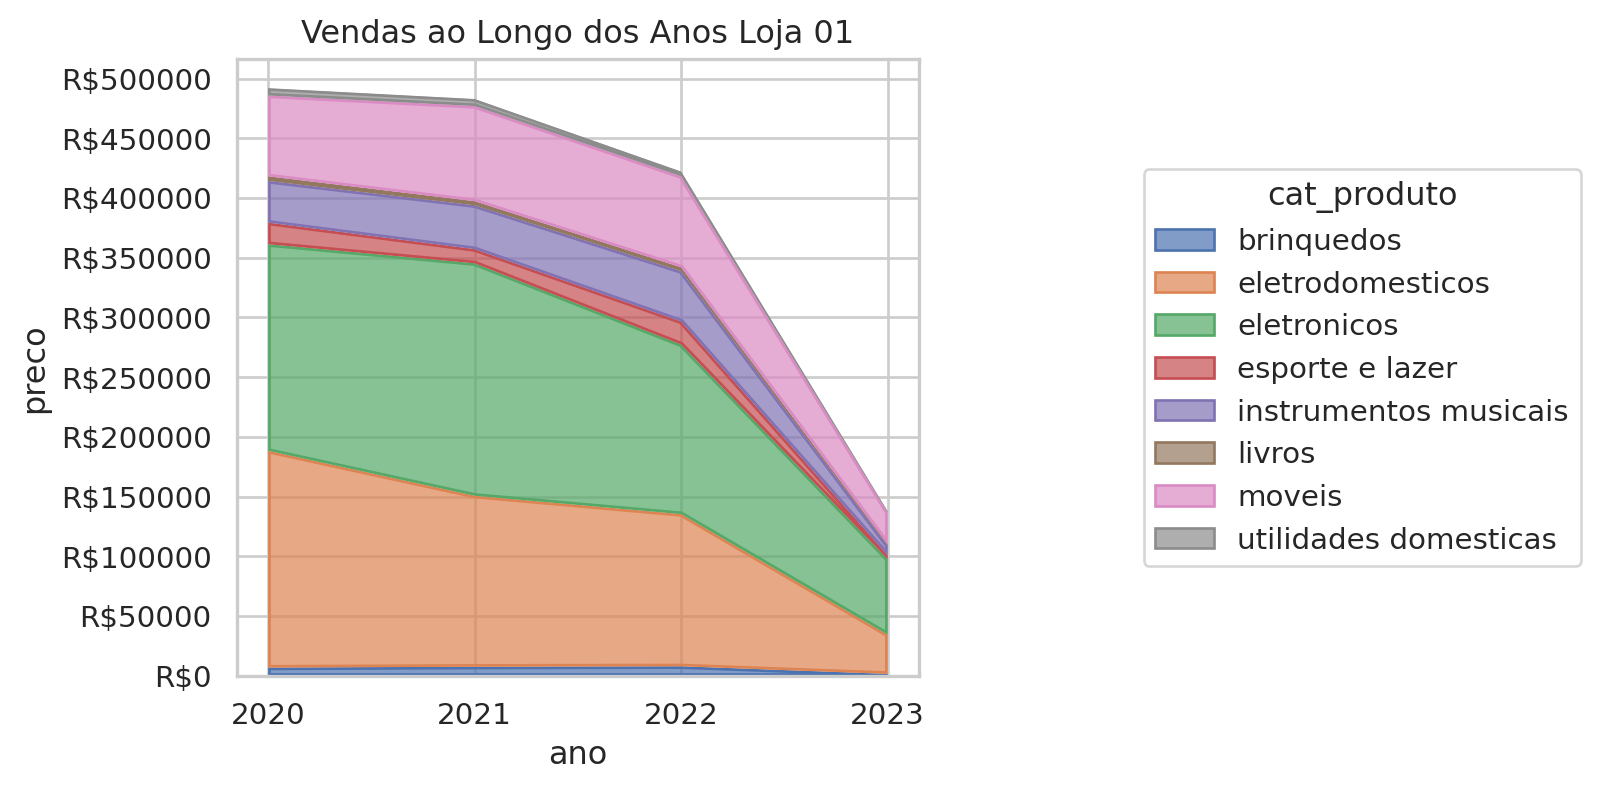

In [6]:
( # LOJA 01
    so.Plot(cat_loja1, x='ano', y='preco',  color='cat_produto').layout(size=(6, 4), extent=[0, 0, .8, 1], engine='constrained')
    .add(so.Area(alpha=.7), so.Stack()).label(title='Vendas ao Longo dos Anos Loja 01').scale(
        x=so.Continuous().tick(every=1),
        y=so.Continuous().tick(every=50000).label(like="R${x:g}"))
)

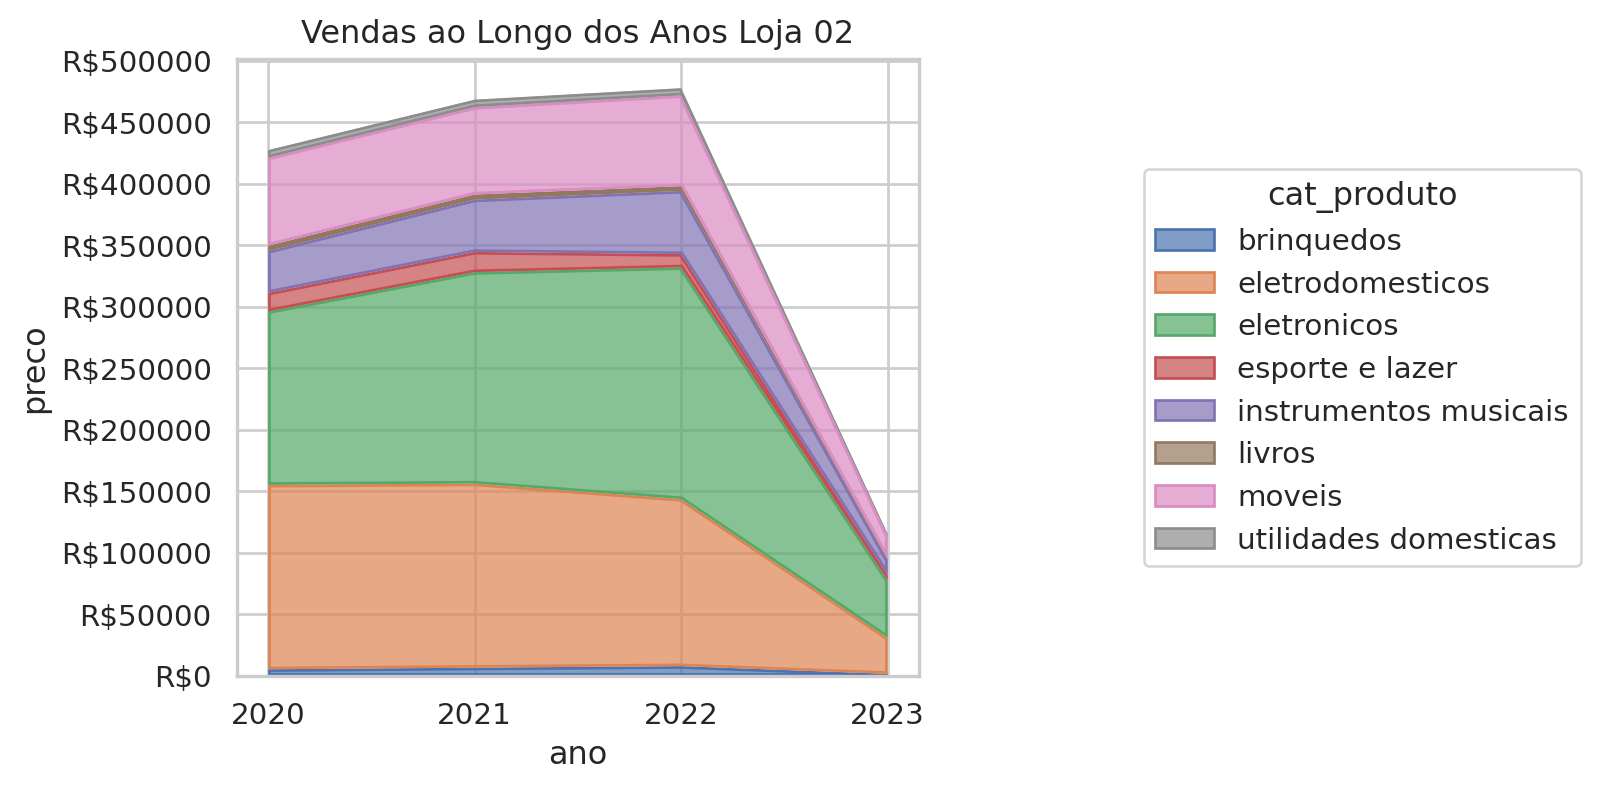

In [7]:
( # LOJA 02
    so.Plot(cat_loja2, x='ano', y='preco',  color='cat_produto').layout(size=(6, 4), extent=[0, 0, .8, 1], engine='constrained')
    .add(so.Area(alpha=.7), so.Stack()).label(title='Vendas ao Longo dos Anos Loja 02').scale(
        x=so.Continuous().tick(every=1),
        y=so.Continuous().tick(every=50000).label(like="R${x:g}"))
)

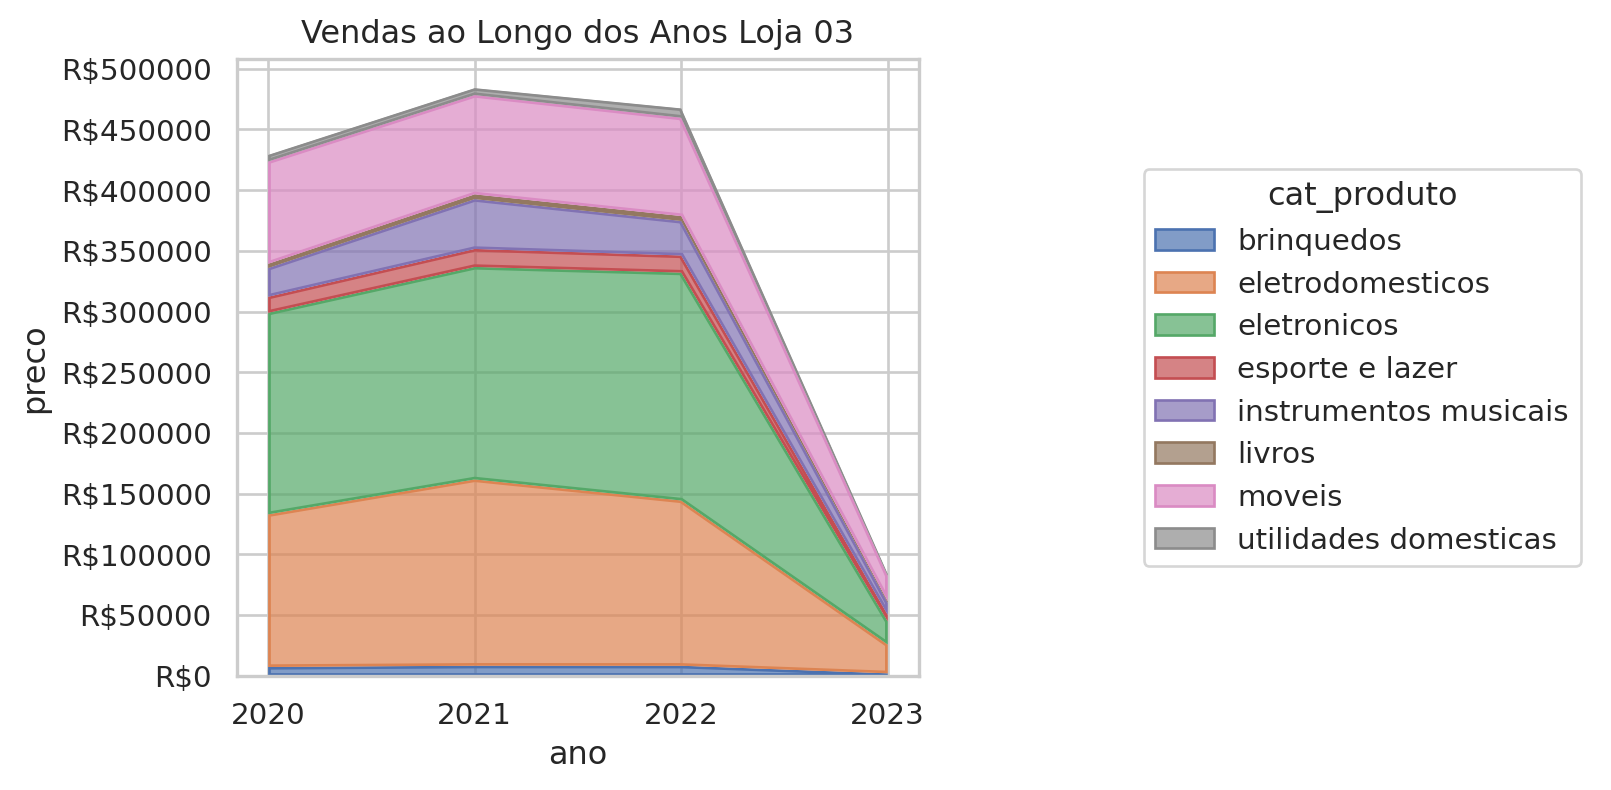

In [8]:
( # LOJA 03
    so.Plot(cat_loja3, x='ano', y='preco',  color='cat_produto').layout(size=(6, 4), extent=[0, 0, .8, 1], engine='constrained')
    .add(so.Area(alpha=.7), so.Stack()).label(title='Vendas ao Longo dos Anos Loja 03').scale(
        x=so.Continuous().tick(every=1),
        y=so.Continuous().tick(every=50000).label(like="R${x:g}"))
)

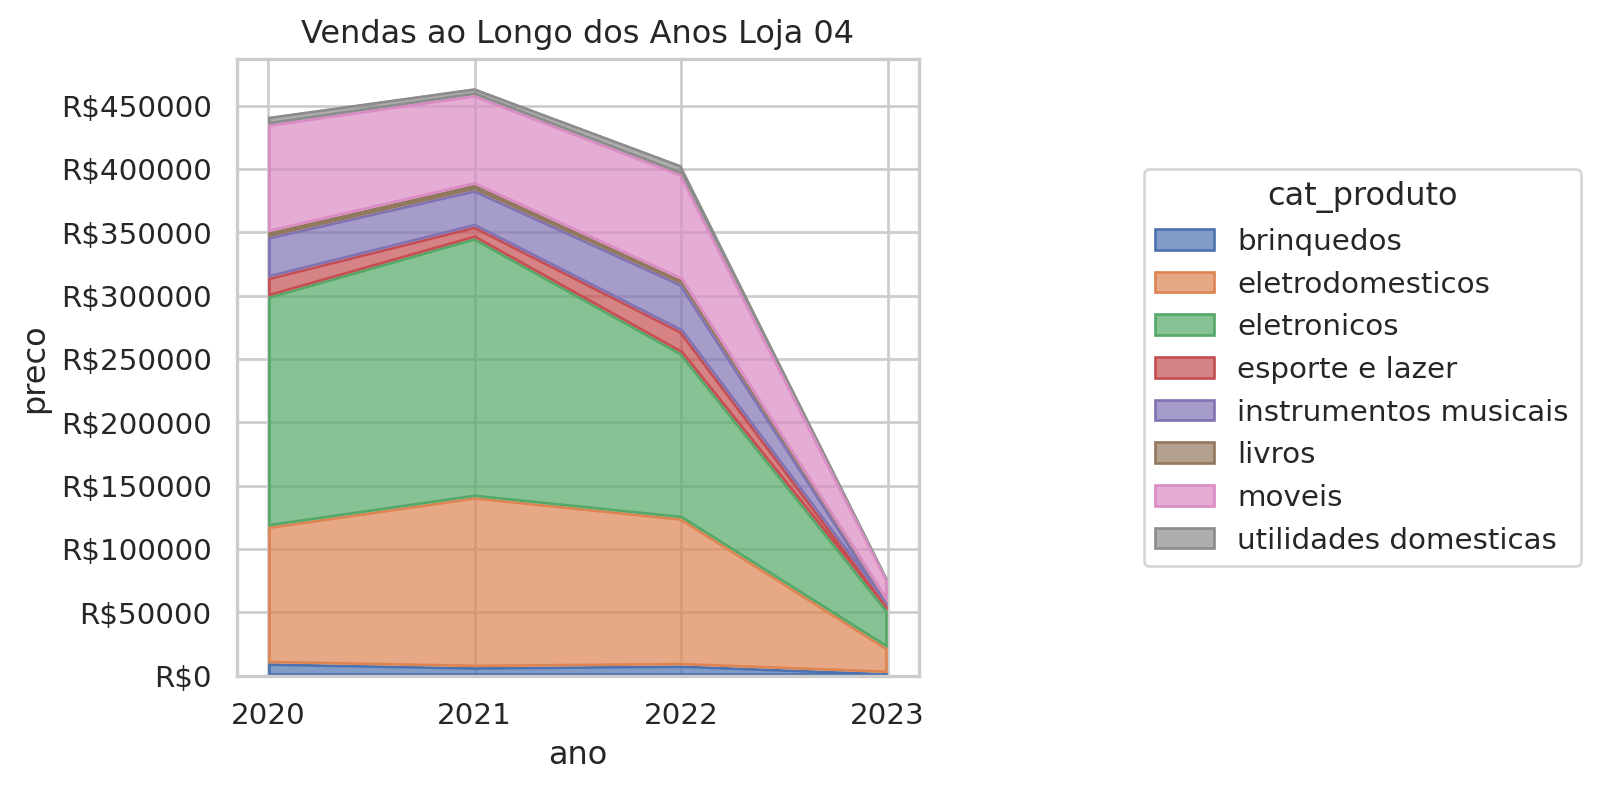

In [9]:
( # LOJA 04
    so.Plot(cat_loja4, x='ano', y='preco',  color='cat_produto').layout(size=(6, 4), extent=[0, 0, .8, 1], engine='constrained')
    .add(so.Area(alpha=.7), so.Stack()).label(title='Vendas ao Longo dos Anos Loja 04').scale(
        x=so.Continuous().tick(every=1),
        y=so.Continuous().tick(every=50000).label(like="R${x:g}"))
)

## 2. Vendas por Categoria

Text(46.249999999999986, 0.5, 'Categoria Produto')

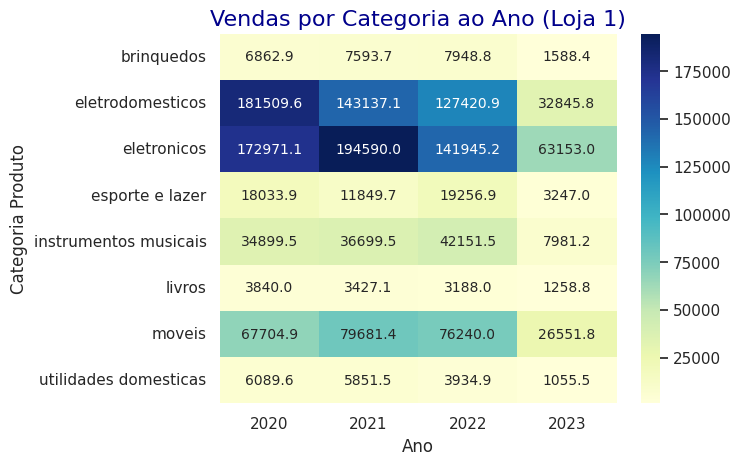

In [17]:
qw = cat_loja1.groupby(['cat_produto', 'ano'])['preco'].sum().reset_index()
sns.heatmap(qw.pivot(index='cat_produto', columns='ano', values='preco'), annot=True, fmt=".1f", annot_kws={"size": 10}, cmap="YlGnBu", cbar=True)

plt.title('Vendas por Categoria ao Ano (Loja 1)', fontsize=16, color='darkblue')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Categoria Produto', fontsize=12)

Text(46.249999999999986, 0.5, 'Categoria Produto')

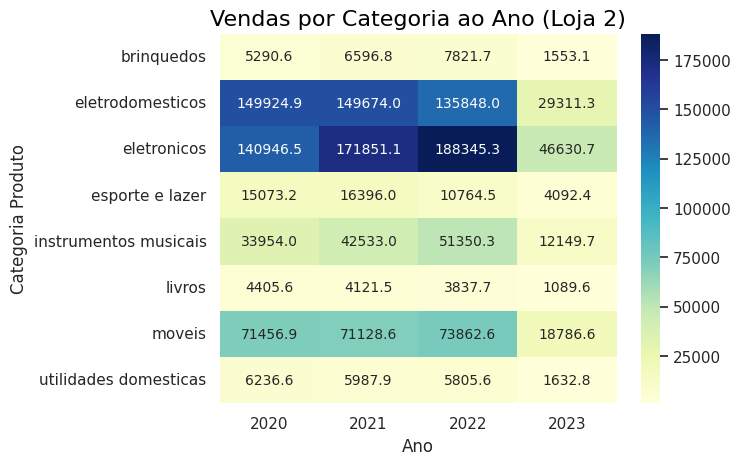

In [18]:
qw2 = cat_loja2.groupby(['cat_produto', 'ano'])['preco'].sum().reset_index()
sns.heatmap(qw2.pivot(index='cat_produto', columns='ano', values='preco'), annot=True, fmt=".1f", annot_kws={"size": 10}, cmap="YlGnBu", cbar=True)

plt.title('Vendas por Categoria ao Ano (Loja 2)', fontsize=16, color='black')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Categoria Produto', fontsize=12)

Text(46.249999999999986, 0.5, 'Categoria Produto')

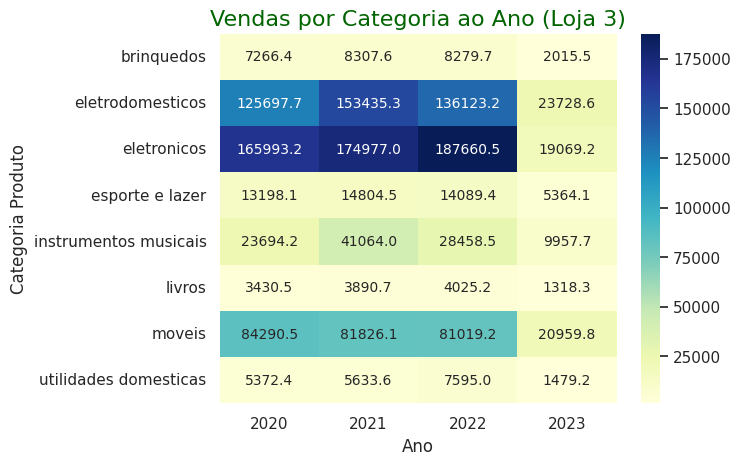

In [19]:
qw3 = cat_loja3.groupby(['cat_produto', 'ano'])['preco'].sum().reset_index()
sns.heatmap(qw3.pivot(index='cat_produto', columns='ano', values='preco'), annot=True, fmt=".1f", annot_kws={"size": 10}, cmap="YlGnBu", cbar=True)

plt.title('Vendas por Categoria ao Ano (Loja 3)', fontsize=16, color='darkgreen')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Categoria Produto', fontsize=12)

Text(46.249999999999986, 0.5, 'Categoria Produto')

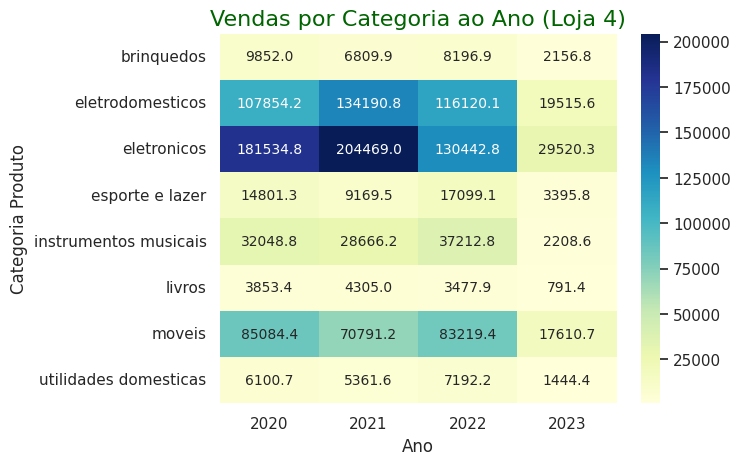

In [36]:
qw4 = cat_loja4.groupby(['cat_produto', 'ano'])['preco'].sum().reset_index()
sns.heatmap(qw4.pivot(index='cat_produto', columns='ano', values='preco'), annot=True, fmt=".1f", annot_kws={"size": 10}, cmap="YlGnBu", cbar=True)

plt.title('Vendas por Categoria ao Ano (Loja 4)', fontsize=16, color='darkgreen')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Categoria Produto', fontsize=12)

# 3. Média de Avaliação das Lojas

In [21]:
# LOJA 01
notas_loja1 = loja1[['ano','nota_compra', 'produto']]
notas_loja1.insert(loc=0, column='LOJA', value='LOJA 01')
# LOJA 02
notas_loja2 = loja2[['ano','nota_compra','produto']]
notas_loja2.insert(loc=0, column='LOJA', value='LOJA 02')
# LOJA 03
notas_loja3 = loja3[['ano','nota_compra', 'produto']]
notas_loja3.insert(loc=0, column='LOJA', value='LOJA 03')
# LOJA 04
notas_loja4 = loja4[['ano','nota_compra', 'produto']]
notas_loja4.insert(loc=0, column='LOJA', value='LOJA 04')


frames = [notas_loja4, notas_loja3, notas_loja2, notas_loja1]
lojas_produtos_notas = pd.concat(frames)
lojas_produtos_notas.rename(columns={'nota_compra':'media_nota_compra', 'LOJA': 'loja'}, inplace=True)

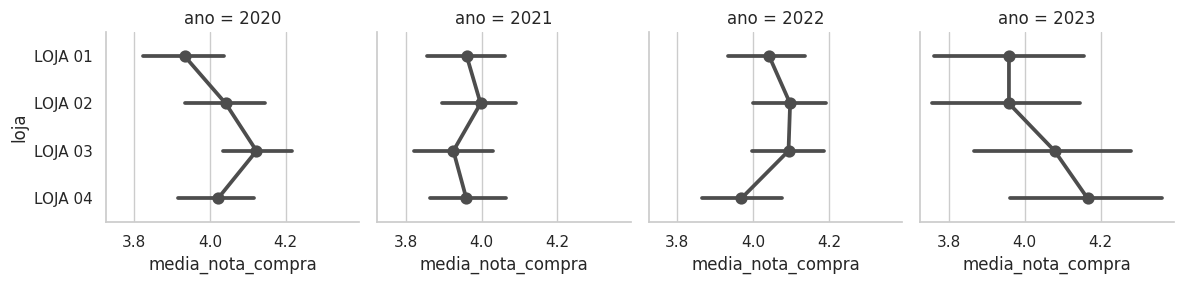

In [22]:
g = sns.FacetGrid(data=lojas_produtos_notas, col='ano', col_wrap=4)
g.map(sns.pointplot, "media_nota_compra", 'loja', order=['LOJA 01', 'LOJA 02', 'LOJA 03', 'LOJA 04'], color=".3", errorbar="ci")

# 4. Produtos Mais e Menos Vendidos

In [23]:
## Contar os produtos mais e menos vendidos por ano e loja
df_contagem = lojas_produtos_notas.groupby(['ano', 'loja'])['produto'].value_counts().reset_index()

max_ano_loja = df_contagem.groupby(['ano', 'loja'])['count'].max().reset_index()
min_ano_loja = df_contagem.groupby(['ano', 'loja'])['count'].min().reset_index()

min_ano_loja.rename(columns={'count':'min_vendidos'}, inplace=True)
max_ano_loja.rename(columns={'count':'max_vendidos'}, inplace=True)


In [24]:
df_contagem_max = pd.merge(max_ano_loja, df_contagem, how='inner', left_on=['ano','loja', 'max_vendidos'], right_on=['ano','loja', 'count'])
df_contagem_min = pd.merge(min_ano_loja, df_contagem, how='inner', left_on=['ano','loja', 'min_vendidos'], right_on=['ano','loja', 'count'])

df_contagem_min.drop(columns='count', inplace=True)
df_contagem_max.drop(columns='count', inplace=True)

In [25]:
# Separar por Loja
df_final_l1 = pd.concat([df_contagem_max.query('loja == "LOJA 01"'), df_contagem_min.query('loja == "LOJA 01"')], ignore_index=True)
df_final_l2 = pd.concat([df_contagem_max.query('loja == "LOJA 02"'), df_contagem_min.query('loja == "LOJA 02"')], ignore_index=True)
df_final_l3 = pd.concat([df_contagem_max.query('loja == "LOJA 03"'), df_contagem_min.query('loja == "LOJA 03"')], ignore_index=True)
df_final_l4 = pd.concat([df_contagem_max.query('loja == "LOJA 04"'), df_contagem_min.query('loja == "LOJA 04"')], ignore_index=True)


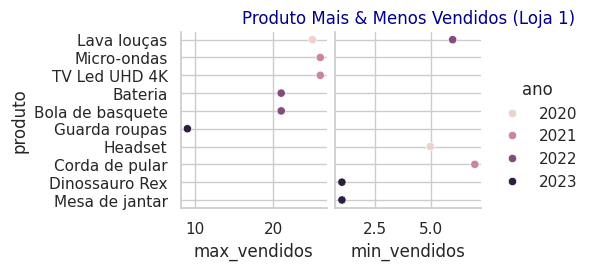

In [39]:
ay_loja1 = sns.pairplot(df_final_l1, hue='ano', x_vars=['max_vendidos', 'min_vendidos'], y_vars='produto', kind='scatter' )

plt.title('Produto Mais & Menos Vendidos (Loja 1)', fontsize=12, color='darkblue')
plt.ylabel('Produto', fontsize=12)

ay_loja1.figure.align_titles()


Text(0.5, 1.0, 'Produto Mais & Menos Vendidos (Loja 2)')

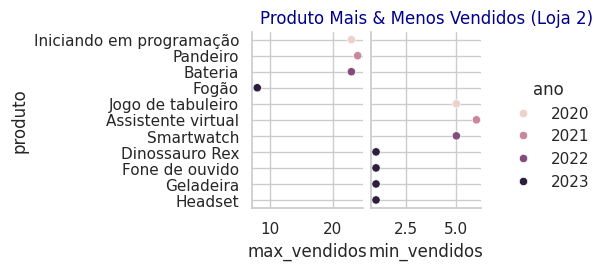

In [40]:
ay_loja2 = sns.pairplot(df_final_l2, hue='ano', x_vars=['max_vendidos', 'min_vendidos'], y_vars='produto' )
ay_loja2.figure.align_titles()

plt.title('Produto Mais & Menos Vendidos (Loja 2)', fontsize=12, color='darkblue')


Text(0.5, 1.0, 'Produto Mais & Menos Vendidos (Loja 3)')

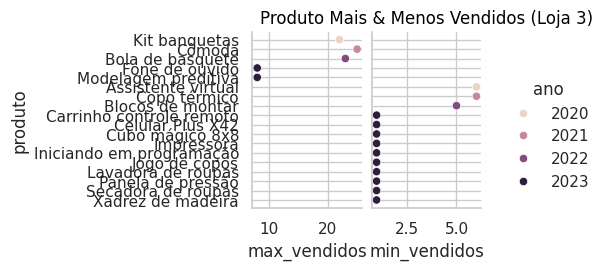

In [42]:
ay_loja3 = sns.pairplot(df_final_l3, hue='ano', x_vars=['max_vendidos', 'min_vendidos'], y_vars='produto')

plt.title('Produto Mais & Menos Vendidos (Loja 3)', fontsize=12, color='black')

Text(0.5, 1.0, 'Produto Mais & Menos Vendidos (Loja 4)')

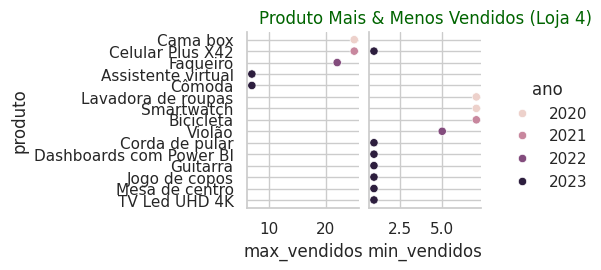

In [43]:
ay_loja4 = sns.pairplot(df_final_l4, hue='ano', x_vars=['max_vendidos', 'min_vendidos'], y_vars='produto')

plt.title('Produto Mais & Menos Vendidos (Loja 4)', fontsize=12, color='darkgreen')

# 5. Frete Médio por Loja


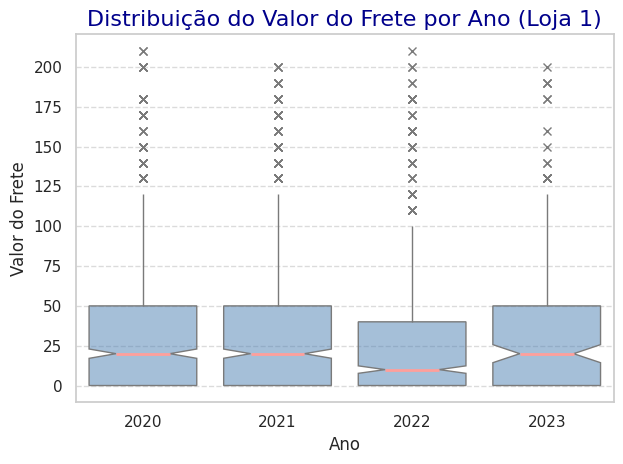

In [30]:
sns.boxplot(x=loja1['ano'], y=loja1['frete'].round(-1),
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 2}
)

ax1 = plt.gca()
ax1.yaxis.set_major_locator(MultipleLocator(25))
ax1.yaxis.set_minor_locator(MultipleLocator(5))

plt.title('Distribuição do Valor do Frete por Ano (Loja 1)', fontsize=16, color='darkblue')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Valor do Frete', fontsize=12)


plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona grade no eixo Y
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

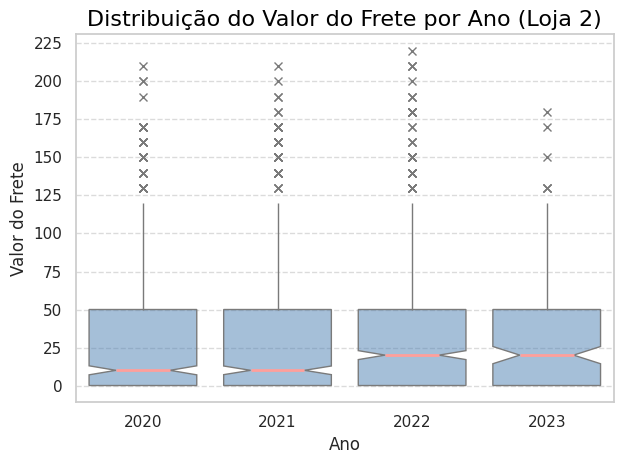

In [31]:
sns.boxplot(x=loja2['ano'], y=loja2['frete'].round(-1),
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 2}
)

ax2 = plt.gca()
ax2.yaxis.set_major_locator(MultipleLocator(25))
ax2.yaxis.set_minor_locator(MultipleLocator(5))

plt.title('Distribuição do Valor do Frete por Ano (Loja 2)', fontsize=16, color='black')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Valor do Frete', fontsize=12)


plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona grade no eixo Y
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

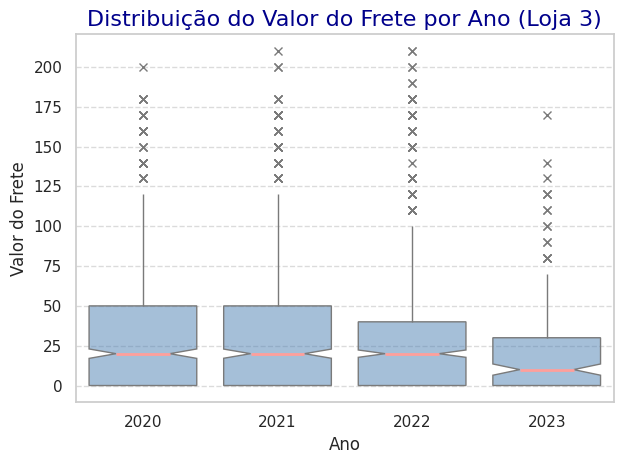

In [32]:
sns.boxplot(x=loja3['ano'], y=loja3['frete'].round(-1),
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 2}
)

ax3 = plt.gca()
ax3.yaxis.set_major_locator(MultipleLocator(25))
ax3.yaxis.set_minor_locator(MultipleLocator(5))

plt.title('Distribuição do Valor do Frete por Ano (Loja 3)', fontsize=16, color='darkblue')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Valor do Frete', fontsize=12)


plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona grade no eixo Y
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

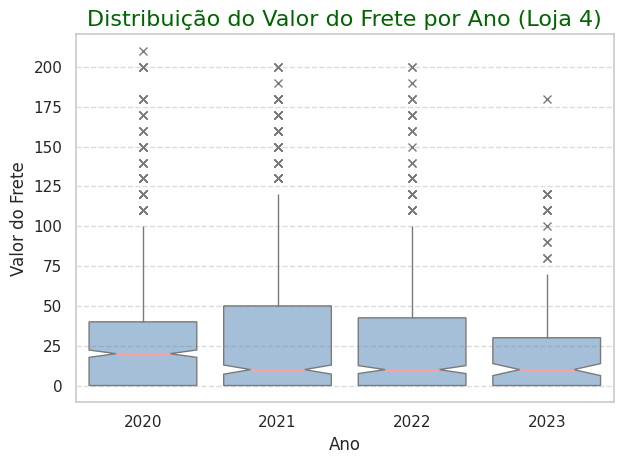

In [33]:
sns.boxplot(x=loja4['ano'], y=loja4['frete'].round(-1),
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 2})

ax4 = plt.gca()
ax4.yaxis.set_major_locator(MultipleLocator(25))
ax4.yaxis.set_minor_locator(MultipleLocator(5))


plt.title('Distribuição do Valor do Frete por Ano (Loja 4)', fontsize=16, color='darkgreen')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Valor do Frete', fontsize=12)


plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona grade no eixo Y
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()


In [47]:
loja1['frete'].describe()

count    2359.000000
mean       34.691805
std        43.814183
min         0.000000
25%         4.141783
50%        16.498835
75%        48.050074
max       214.377060
Name: frete, dtype: float64

## Relatório

Com base na análise do lucro líquido, sugerimos a venda da Loja 04. A Loja 04 apresentou consistentemente o menor lucro líquido entre todas as unidades, outros indicadores, como Vendas por Categoria, Frete Médio por Loja, Produtos Mais e Menos Vendidos, e a Média de Avaliação das Lojas, não demonstraram um nível de significância que justifique, em relação às demais unidades